The data set analyzed in this notebook contains all accidents that occurred on Dutch roads in 2015. The data are part of a broader regstration initiative by the Dutch police, as a part of which all accidents on the Dutch roads are being registered.

Because the data set has an impressive level of detail, it seems fun to try and do some machine learning with it. 

First, let's import some libraries that will prove useful later on:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
from twilio.rest import TwilioRestClient

%matplotlib inline

Next, we can define some custom functions in for the purposes of processing the raw data files, dealing with NA values, generating dummy variables, and plotting a correlation matrix in a memory-efficient way. The cell directly belo contains a link to the twilio web platform, allowing me to receive an SMS whenever the notebook has finished running. Feel free to enter your own account information and use it.

In [2]:
# Merge the various source files

def pathMerge(path, df, mergecol):
    """Read path of one of the reference files, and merge it with base file based on mergecol.
    
    Input:
    path = path to auxiliary data set to append to df
    df = data frame containing the full dataset
    mergecol = column containing the key on which to merge full dataset and auxiliary data
    """
    df_tmp = pd.read_csv(path, sep = ',', header=0)
    df_tmp.rename(columns={'NTT_CODE_B':'NTT_CODE'}, inplace=True)
    df = pd.merge(df, df_tmp, how='left', on = mergecol)
    return df

# Handle NA values in columns of various data types

def fillnaInt(df, colnames, fillval):
    """Takes a pandas dataFrame df and fills missing values with integer value fillval
    
    Input:
    df = Data frame containing string column with NA values to mutate;
    colnames = list of integer columns to mutate;
    fillval = value with which to fill NA values"""
    for col in colnames:
        df.loc[:,col] = df.loc[:,col].fillna(fillval)
        df.loc[:,col] = df.loc[:,col].astype('int64')
    return df

def fillnaStr(df, colnames, fillval):
    """Takes a pandas dataFrame df and fills missing values with string value fillval
    
    Input:
    df = Data frame containing string column with NA values to mutate;
    colnames = list of string columns to mutatue;
    fillval = value with which to fill NA values"""
    for col in colnames:
        df.loc[:,col] = df.loc[:,col].fillna(fillval)
        df.loc[:,col] = df.loc[:,col].astype('object')
    return df

def fillnaFloat(df, colnames, fillval):
    """Takes a pandas dataFrame df and fills missing values with float value fillval, converts dtype to int64
    
    Input:
    df = Data frame containing float column with NA values to mutate;
    colnames = list of string columns to mutatue;
    fillval = value with which to fill NA values"""
    for col in colnames:
        df.loc[:,col] = df.loc[:,col].fillna(fillval)
        df.loc[:,col] = df.loc[:,col].astype('int64')
    return df

# Generate dummy variables for categorical variables

def nominalDummies(df, dummycol):
    """Check for NA values, and add dummies to a dataframe based on values of a categorical column within the dataframe.
    
    Input:
    df = Data Frame in which  dummies are to be created;
    dummycol = string name of categorical column to change into dummy variables."""
    
    if df[dummycol].isnull().sum() > 0:
        featureStore = []
        featureName = str(dummycol)+'_'
        nanEntry = [(featureName+'NaN')]
        featureValueList = df[dummycol].unique()
        for i in range(0, len(featureValueList),1):
            featureValue = copy(featureValueList[i])
            featureStore.append(str(featureName)+str(featureValue))
        dummyNames = featureStore.append(nanEntry)
        dummyNames = list(dummyNames)
        
        df_dummies = pd.get_dummies(df[dummycol], prefix = dummyNames, dummy_na = True)
    else:
        featureStore = []
        featureName = str(dummycol)+'_'
        featureValueList = df[dummycol].unique()
        for i in range(0, len(featureValueList),1):
            featureValue = copy(featureValueList[i])
            featureStore.append(str(featureName)+str(featureValue))
        dummyNames = featureStore
        dummyNames = list(dummyNames)
        df_dummies = pd.get_dummies(df[dummycol], prefix = dummyNames, dummy_na = True)
    df = pd.concat([df, df_dummies], axis=1)
    return df

def plot_corr(df,size=10):
    """Plot a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot"""

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    plt.clf()

In [3]:
#! python3
# textMyself.py - Defines the textmyself() function that texts a message
# passed to it as a string.

# Preset values:
accountSID = 'ACca6a878a0c245364861486adf9d3bdfd'
authToken = '8ca079a0444e145ac9823ad72f4f81e4'
myNumber = '+31641304035'
twilioNumber = '+3197014200353'

def textmyself(message):
    print('NOTIFY DA HU-MON!!!')
    twilioCli = TwilioRestClient(accountSID, authToken)
    twilioCli.messages.create(body=message, from_=twilioNumber, to=myNumber)
    print('HU-MON KNOOWS!!1!')

In [4]:
# Read in and merge relevant data files
pathList = ['partijen.txt', 'partijaanvullingen.txt', 'manoeuvres.txt', 'aardongevallen.txt', 'nationaliteiten.txt', 'wegsituaties.txt', 'wegverlichtingen.txt', 'wegverhardingen.txt', 'zichtafstanden.txt']
columnList = ['VKL_NUMMER', 'PTJ_ID', 'MNE_CODE', 'AOL_ID', 'NTT_CODE', 'WSE_ID', 'WVL_ID', 'WVG_ID', 'ZAD_ID']
df = pd.read_csv('ongevallen.txt', sep=",", header=0)
for i in range(0,(len(pathList)),1):
    df = pathMerge(pathList[i], df, columnList[i])

C:\Users\Evert-Jan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,35,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Evert-Jan\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (7,8,22,24,25,28,30,35,39) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


This dataset has an issue when determining the data types of a number of variables. This is good to note - we can examine the values in each column later on to see if we can find a reason for it. The dataset has over 187000 rows and, at this point, 116 columns.

In [5]:
# Explore data: Size and names
print(df.shape)
print(df.columns)
print(df.index)

(187215, 116)
Index([u'VKL_NUMMER', u'REGNUMMER', u'PVOPGEM', u'DATUM_VKL', u'DAG_CODE',
       u'MND_NUMMER', u'JAAR_VKL', u'TIJDSTIP', u'UUR', u'DDL_ID',
       ...
       u'LENGTE', u'APKGEK', u'VERZEK', u'MNE_OMS', u'AOL_OMS', u'NTT_OMS',
       u'WSE_OMS', u'WVL_OMS', u'WVG_OMS', u'ZAD_OMS'],
      dtype='object', length=116)
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            187205, 187206, 187207, 187208, 187209, 187210, 187211, 187212,
            187213, 187214],
           dtype='int64', length=187215)


Next, let's look at some values for each column, to get an impression of what it contains. 

In [6]:
# Explore data: Feature values and properties
for col in df.columns:
    print(df[col].head())
    print(df[col].describe())
    print(df[col].dtype)
    print("\n\n")

0    20150066102
1    20150066102
2    20150066102
3    20150066103
4    20150066103
Name: VKL_NUMMER, dtype: int64
count    1.872150e+05
mean     2.015147e+10
std      3.283449e+06
min      2.015000e+10
25%      2.015003e+10
50%      2.015006e+10
75%      2.015009e+10
max      2.015912e+10
Name: VKL_NUMMER, dtype: float64
int64



0    2015298854
1    2015298854
2    2015298854
3    2015328266
4    2015328266
Name: REGNUMMER, dtype: object
count         176671
unique         95767
top       2015199945
freq              16
Name: REGNUMMER, dtype: int64
object



0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: PVOPGEM, dtype: object
count     15466
unique        1
top           J
freq      15466
Name: PVOPGEM, dtype: object
object



0    20151012
1    20151012
2    20151012
3    20151110
4    20151110
Name: DATUM_VKL, dtype: int64
count    1.872150e+05
mean     2.015069e+07
std      3.473652e+02
min      2.015010e+07
25%      2.015041e+07
50%      2.015071e+07
75%      2.015101e+07


Looking at the NaN and unique counts directly below, many variables have many values missing. Since we can't determine why so many of these values are missing (could be administrative non-compliance, impossible to assess in the situation, not applicable, or other reasons), we should consider representing these variables as categorical, with a NA category included. 

In [18]:
df = df.replace('NaN', np.nan)
df = df.replace('nan', np.nan)

# Explore data: Value composition per column
value = pd.concat([(df.isnull().sum()), df.nunique()],axis=1)
# Based on this initial reading of missing values, several features will have to be dropped due to extreme numbers of missing values
value.columns=['NaN_values', 'Number_unique']
value['Percentage_NaN'] = (value['NaN_values'] / 187215)*100
select_complete = value.loc[value['Percentage_NaN']<5,:]
print(select_complete)
for row in select_complete.index.values:
    print(df.loc[:,row].value_counts()) #Unique values per column < 5% missing, with frequencies


            NaN_values  Number_unique  Percentage_NaN
VKL_NUMMER           0         113289        0.000000
DATUM_VKL            0            365        0.000000
DAG_CODE             0              7        0.000000
MND_NUMMER           0             12        0.000000
JAAR_VKL             0              1        0.000000
TIJDSTIP             2           1440        0.001068
UUR                  2             24        0.001068
DDL_ID               2              6        0.001068
AP3_CODE             0              3        0.000000
AP4_CODE             0              4        0.000000
AP5_CODE             0              5        0.000000
ANTL_SLA             0              9        0.000000
ANTL_DOD             0              5        0.000000
ANTL_GZH             0              9        0.000000
ANTL_SEH             0              4        0.000000
ANTL_GOV             0              7        0.000000
ANTL_PTJ             0             15        0.000000
ANTL_TDT             0      

In [7]:
# Separate target from predictive variables
X = df
y = df.loc[:,'ANTL_SLA']
X = X.drop(['ANTL_SLA', 'ANTL_PAS', 'VKL_NUMMER', 'DATUM_VKL', 'JAAR_VKL', 'DDL_ID', 'AP3_CODE', 'AP4_CODE', 'AP5_CODE', 'ANTL_DOD', 'ANTL_GZH', 'ANTL_SEH', 'ANTL_GOV', 'MNE_CODE', 'AOL_ID', 'NIVEAUKOP', 'WSE_ID', 'WSE_AN', 'WVL_ID', 'WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN', 'LGD_ID', 'ZAD_ID', 'REGNUMMER', 'BSD_NAAM', 'BZD_ID_IF2', 'BZD_ID_IF3', 'BZD_ID_TA3', 'BZD_TA_AN', 'JTE_ID', 'WVK_ID', 'HECTOMETER', 'FK_VELD5', 'HUISNUMMER', 'GME_NAAM', 'PVE_NAAM', 'GEBJAAR', 'GEVSTOF', 'LGD_ID', 'UITGPOS2', 'WIK_NAAM', 'WSE_AN', 'WTM_NAAM', 'WTP_NAAM', 'NUMMER', 'OTE_ID', 'OTE_AN', 'AGT_ID_1', 'AGT_ID_2', 'BWG_ID_1', 'BWG_ID_2', 'BWG_AN', 'TDT_ID_1', 'TDT_ID_2', 'TDT_ID_3', 'TDT_AN', 'BZD_ID_VM1', 'BZD_ID_VM2', 'BZD_ID_VM3', 'BZD_VM_AN', 'BZD_ID_IF1', 'BZD_ID_IF2', 'BZD_ID_IF3', 'BZD_IF_AN', 'BZD_ID_TA1', 'BZD_ID_TA2', 'BZD_ID_TA3', 'BZD_TA_AN', 'UITGPOS2', 'UITGPOS_AN', 'PTJ_ID', 'NTT_CODE_V', 'VTGVERZ', 'SCHADE', 'GETRAANH', 'VTGVERL', 'LKE_ID', 'BROMFCERT', 'IRG_CODE'], axis=1) 
# First variable dropped is our target, other variables dropped because of no apparent values, judged by visual inspection of histogram, or no added feature value, judged by description in dataset manual.    
         

In [8]:
print(X.columns)

Index([u'PVOPGEM', u'DAG_CODE', u'MND_NUMMER', u'TIJDSTIP', u'UUR',
       u'ANTL_PTJ', u'ANTL_TDT', u'BEBKOM', u'MAXSNELHD', u'WGD_CODE_1',
       u'WGD_CODE_2', u'GME_ID', u'PVE_CODE', u'KDD_NAAM', u'PLT_NAAM',
       u'DOORRIJDER', u'GEBDAT', u'LEEFTIJD', u'NTT_CODE', u'GESLACHT',
       u'BLAASTEST', u'ART8', u'MEDICGEBR', u'RIJBEWGEL', u'RIJBEWCAT',
       u'RIJBEWBEG', u'UITGPOS1', u'VOORGBEW', u'AGT_TYPE', u'EERTOEDAT',
       u'MASSALEEG', u'BREEDTE', u'LENGTE', u'APKGEK', u'VERZEK', u'MNE_OMS',
       u'AOL_OMS', u'NTT_OMS', u'WSE_OMS', u'WVL_OMS', u'WVG_OMS', u'ZAD_OMS'],
      dtype='object')


In [9]:
# Rename columns
X.rename(columns={'DAG_CODE':'DAG_ONGEVAL', 'MND_NUMMER':'MND_ONGEVAL'}, inplace=True)

# Fill NA values with appropriate codes, -1 for int, 'NaN' for str, set dtype to appropriate dtype
X = fillnaInt(X, ['UUR'], (X['UUR'].median()))
X = fillnaInt(X, ['LEEFTIJD'], (X['LEEFTIJD'].mean()))
X = fillnaInt(X, ['MASSALEEG'], (X['MASSALEEG'].median()))
X = fillnaInt(X, ['MND_ONGEVAL', 'MAXSNELHD', 'UITGPOS1', 'VOORGBEW'], -1)
X = fillnaStr(X, ['PVOPGEM', 'RIJBEWGEL', 'MEDICGEBR', 'DOORRIJDER', 'GESLACHT', 'VERZEK', 'APKGEK', 'RIJBEWBEG', 'DAG_ONGEVAL', 'BLAASTEST', 'BEBKOM', 'WGD_CODE_1', 'WGD_CODE_2', 'KDD_NAAM', 'PLT_NAAM', 'NTT_CODE', 'ART8', 'RIJBEWCAT', 'AGT_TYPE', 'MNE_OMS', 'AOL_OMS', 'NTT_OMS', 'WSE_OMS', 'WVL_OMS', 'WVG_OMS', 'ZAD_OMS'], 'NaN')
X = fillnaInt(X, ['TIJDSTIP', 'GEBDAT', 'EERTOEDAT'], -1.0)

# Drop breedte and lengte due to too many missing values
X = X.drop(['BREEDTE', 'LENGTE'], axis=1)



In [10]:
# Convert varibales with dtype int64
X_save = X.loc[:,['LEEFTIJD', 'MASSALEEG', 'TIJDSTIP', 'GEBDAT', 'EERTOEDAT']]
X_recode = X.drop(['LEEFTIJD', 'MASSALEEG', 'TIJDSTIP', 'GEBDAT', 'EERTOEDAT'], axis=1)
X_ints = X_recode.select_dtypes(include=['int64'])
X_obj = X_recode.select_dtypes(include=['object'])
for col in X_ints.columns:
    X_ints.loc[:,col] = X_ints.loc[:,col].astype('category').cat.codes
X_changedtype = pd.concat([X_ints, X_obj], axis=1)
print(X_changedtype.shape, X_changedtype.dtypes)


C:\Users\Evert-Jan\Anaconda2\lib\site-packages\pandas\core\indexing.py:601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Evert-Jan\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


((187215, 35), MND_ONGEVAL      int8
UUR              int8
ANTL_PTJ         int8
ANTL_TDT         int8
MAXSNELHD        int8
GME_ID          int16
UITGPOS1         int8
VOORGBEW         int8
PVOPGEM        object
DAG_ONGEVAL    object
BEBKOM         object
WGD_CODE_1     object
WGD_CODE_2     object
PVE_CODE       object
KDD_NAAM       object
PLT_NAAM       object
DOORRIJDER     object
NTT_CODE       object
GESLACHT       object
BLAASTEST      object
ART8           object
MEDICGEBR      object
RIJBEWGEL      object
RIJBEWCAT      object
RIJBEWBEG      object
AGT_TYPE       object
APKGEK         object
VERZEK         object
MNE_OMS        object
AOL_OMS        object
NTT_OMS        object
WSE_OMS        object
WVL_OMS        object
WVG_OMS        object
ZAD_OMS        object
dtype: object)


In [11]:
# Get dummies for all appropriate columns 
X_dummies = pd.get_dummies(X_changedtype, columns = X_changedtype.columns)
# Normalize continuous numeric variables to equate scaling to dummies
from sklearn.preprocessing import Normalizer
nrml = Normalizer()
X_save['LEEFTIJD'] = nrml.fit_transform(X_save['LEEFTIJD'].reshape(-1, 1))
X_save['MASSALEEG'] = nrml.fit_transform(X_save['MASSALEEG'].reshape(-1, 1))

C:\Users\Evert-Jan\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\Evert-Jan\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [12]:
# Recode time data
X_save['GEBDAT'] = pd.to_datetime(X_save['GEBDAT'], format='%Y%m%d', errors='coerce')
X_save['EERTOEDAT'] = pd.to_datetime(X_save['EERTOEDAT'], format='%Y%m%d', errors='coerce')
X_save['TIJDSTIP'] = pd.to_datetime(X_save['TIJDSTIP'], format='%H%M', errors='coerce')
X_save['TIJDSTIP'] = X_save['TIJDSTIP'].dt.time
print(X_save.head(10))

# Merge df with X
X_use = pd.concat([X_save, X_dummies], axis=1)
X_use = fillnaInt(X_use, ['LEEFTIJD'], (X_use['LEEFTIJD'].mean()))
X_use = fillnaInt(X_use, ['MASSALEEG'], (X_use['MASSALEEG'].median()))

# Drop date columns for now
X_use = X_use.drop(['GEBDAT', 'EERTOEDAT', 'TIJDSTIP'], axis=1)

   LEEFTIJD  MASSALEEG  TIJDSTIP     GEBDAT  EERTOEDAT
0       1.0        1.0  14:10:00        NaT 2011-02-02
1       1.0        1.0  14:10:00 1946-06-27 2009-01-06
2       1.0        1.0  14:10:00 1969-06-17 2003-07-18
3       1.0        1.0  18:15:00 1973-05-04 1995-06-23
4       1.0        1.0  18:15:00 1967-04-06 2005-04-28
5       1.0        1.0  18:15:00 1968-10-10 2014-01-31
6       1.0        1.0  18:15:00 1965-03-04 2015-03-03
7       1.0        1.0  18:55:00        NaT 2009-09-22
8       1.0        1.0  23:00:00        NaT 2012-01-31
9       1.0        1.0  23:00:00        NaT 1995-07-04


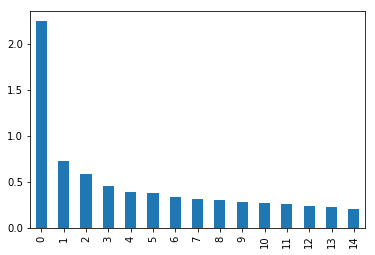

In [13]:
# Use PCA to reduce dimensions to 15 (after visual inspection of graph of PCA with n_dimensions = 30)
from sklearn.decomposition import PCA
pca = PCA(15)
X_pca = pca.fit_transform(X_use)

#Visually examine the explained variance contributed by each component
pd.Series(pca.explained_variance_).plot.bar()
plt.show()
plt.clf()

In [34]:
# It seems there is one key component in this data set, which has an Eigenvalue of > 2. If we'd want to prevent traffic accident causes this seems interesting, as it suggests there may be a single caular cause to tackle. However, it could also be that this component is driven by features of which the variance is tautological with whether victims were involved. Let's see by correlating the derived features to each of the original features. 

correlate = pd.concat([X_use, pd.DataFrame(X_pca)], axis = 1)
df_correlated = correlate.corr()
df_components = df_correlated.loc[:,[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]]
for component in df_components.columns:
    print(component)
    print('\n')
    print(df_components.loc[((df_components[component]<-.5)|(df_components[component]>.5)),component])
    print('\n')
    print('\n')

RangeIndex(start=0, stop=15, step=1)
0


ANTL_PTJ_0               0.834382
MAXSNELHD_0              0.596076
BEBKOM_NaN               0.857442
WGD_CODE_1_D            -0.627913
WGD_CODE_1_NaN           0.852293
NTT_CODE_NL             -0.765156
NTT_CODE_NaN             0.822456
GESLACHT_M              -0.518867
GESLACHT_NaN             0.824582
APKGEK_J                -0.527233
APKGEK_NaN               0.529994
VERZEK_NaN               0.599404
NTT_OMS_NEDERLAND       -0.765156
NTT_OMS_NaN              0.822456
WSE_OMS_NaN              0.854251
WVL_OMS_NaN              0.848925
WVL_OMS_Niet brandend   -0.541965
WVG_OMS_NaN              0.827900
WVG_OMS_Overig asfalt   -0.519811
0                        1.000000
Name: 0, dtype: float64




1


BEBKOM_BI   -0.569922
1            1.000000
Name: 1, dtype: float64




2


BEBKOM_BI            -0.527584
BEBKOM_BU             0.799024
WSE_OMS_Rechte weg    0.524725
2                     1.000000
Name: 2, dtype: float64




3


APKGEK_J      0

In [14]:
# Recode y into dichotomous variable
y[y!=0] = 1
print(y.value_counts())

0    149907
1     37308
Name: ANTL_SLA, dtype: int64


C:\Users\Evert-Jan\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
y = pd.to_numeric(y, errors = 'coerce')
X_res, y_res = sm.fit_sample(X_pca,y)
X = pd.DataFrame(X_res)
y = pd.Series(y_res, name = 'Slachtoffers')
#print(X)
#print(y)
print(y.value_counts())

1    149907
0    149907
Name: Slachtoffers, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.4)

In [18]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(Xtrain, ytrain)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [19]:
print('original score: ' + str(clf.score(Xtrain,ytrain)))


original score: 0.73532976074


In [20]:
ypred = clf.predict(Xtest)
y_compare = pd.concat([pd.Series(ytest), pd.Series(ypred)], axis = 1)
y_compare.columns=['true', 'estimate']
y_compare['comparison'] = 0 
y_compare.loc[(y_compare['true']==y_compare['estimate']), 'comparison']=1


In [21]:
print('Original prediction score: ' + str(clf.score(Xtest,ytest)))

Original prediction score: 0.733168787419


In [22]:
# Diagnose ROC metrics
from sklearn.metrics import classification_report
print(classification_report(pd.Series(ytest), pd.Series(ypred)))

             precision    recall  f1-score   support

          0       0.74      0.72      0.73     59959
          1       0.73      0.74      0.74     59967

avg / total       0.73      0.73      0.73    119926



In [35]:
# At .73, our estimator's performance is better than chance (.5), but not nearly reliable enough for accurate estimates.

# Let's implement GridSearchCV to try and improve the scores, and enable its cross-validation to improve reliability of our scores.

from sklearn.model_selection import GridSearchCV

#parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[.1, 1, 10]} # round 1
parameters = {'C':[3, 10, 30, 100, 300]} #round 2
clf_gs = GridSearchCV(SVC(kernel = 'rbf'), parameters, cv=5)
clf_gs.fit(Xtrain, ytrain)
print(clf_gs.score(Xtrain, ytrain))
print(clf_gs.cv_results_)

# round 1: rbf performs best, C = 10 performs best


KeyboardInterrupt: 

In [ ]:
textmyself('HUU-MON! DA accidents WORK IZ DONE!!1!')